C:\Users\DELL\AppData\Local\Temp\ipykernel_520\1870468187.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('city_temperature.csv', dtype=dtype_dict)


Enter the name of the country you're planning to visit: norway
Enter your desired minimum temperature in Celsius: 5
Enter your desired maximum temperature in Celsius: 15
The best day to visit Norway is around:
January 8th
Some other recommended dates to visit Norway are:
February 16th
March 18th
December 16th
December 31th

Some other facts about Norway:

The warmest year in Norway was: 2017.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_520\1870468187.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warmest_year['Year'] = int(warmest_year['Year'])


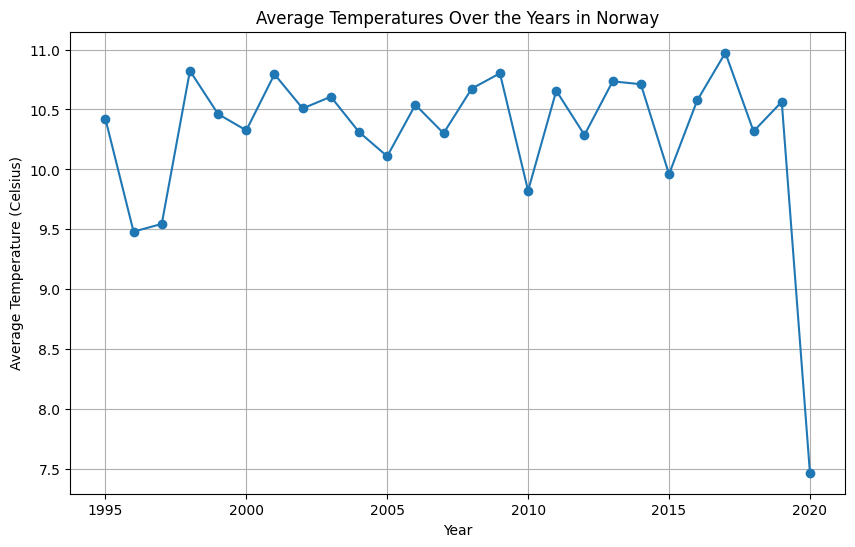

In [13]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

dtype_dict = {'Country': str, 'AvgTemperature': float, 'Month': int, 'Day': int}

data = pd.read_csv('city_temperature.csv', dtype=dtype_dict)

data['Temperature_C'] = (data['AvgTemperature'] - 32) * 5/9

try:
    user_country = input("Enter the name of the country you're planning to visit: ")

    country_data = data[data['Country'].str.lower() == user_country.lower()]

    if country_data.empty:
        raise ValueError("Data not available for the specified country.")

    desired_min_temp_C = float(input("Enter your desired minimum temperature in Celsius: "))
    desired_max_temp_C = float(input("Enter your desired maximum temperature in Celsius: "))

    filtered_data = country_data[
        (country_data['Temperature_C'] >= desired_min_temp_C) &
        (country_data['Temperature_C'] <= desired_max_temp_C)
    ]

    if filtered_data.empty:
        raise ValueError("No dates with temperatures in the specified range.")

    average_temperatures = filtered_data.groupby(['Month', 'Day'])['Temperature_C'].mean().reset_index()

    closest_dates = average_temperatures.nsmallest(1, 'Temperature_C', 'all')
    closest_dates1 = average_temperatures.nsmallest(3, 'Temperature_C', 'all')

    closest_dates['Month'] = closest_dates['Month'].apply(lambda x: calendar.month_name[int(x)])
    closest_dates1['Month'] = closest_dates1['Month'].apply(lambda x: calendar.month_name[int(x)])

    print(f"The best day to visit {user_country.capitalize()} is around:")
    for index, row in closest_dates.iterrows():
        print(f"{row['Month']} {int(row['Day'])}th")
        
    print(f"Some other recommended dates to visit {user_country.capitalize()} are:")
    for index, row in closest_dates1.iloc[1:].iterrows():
        print(f"{row['Month']} {int(row['Day'])}th")
        
        average_temperatures = filtered_data.groupby('Year')['Temperature_C'].mean().reset_index()

    warmest_year = average_temperatures.loc[average_temperatures['Temperature_C'].idxmax()]

    warmest_year['Year'] = int(warmest_year['Year'])

    print(f"\nSome other facts about {user_country.capitalize()}:")
    print(f"\nThe warmest year in {user_country.capitalize()} was: {warmest_year['Year']}")

    plt.figure(figsize=(10, 6))
    plt.plot(average_temperatures['Year'], average_temperatures['Temperature_C'], marker='o')
    plt.title(f"Average Temperatures Over the Years in {user_country.capitalize()}")
    plt.xlabel("Year")
    plt.ylabel("Average Temperature (Celsius)")
    plt.grid(True)
    plt.show()
    
except ValueError as ve:
    print("Error:", ve)
except Exception as e:
    print("An error occurred:", e)
